In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

data = pd.read_csv('car.csv')
# data.describe()


data



,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [37]:
catMapper = [
    ['low', 'med', 'high','vhigh'],
    ['low', 'med', 'high','vhigh'],
    ['2', '3', '4','5more'],
    ['2', '4', 'more'],
    ['small', 'med', 'big'],
    ['low', 'med', 'high'],
    ['unacc', 'acc', 'good','vgood'],
]

encoder = OrdinalEncoder(categories=catMapper)
data = pd.DataFrame(encoder.fit_transform(data), columns=data.columns)

data

,buying,maint,doors,persons,lug_boot,safety,class
0,3.0,3.0,0.0,0.0,0.0,0.0,0.0
1,3.0,3.0,0.0,0.0,0.0,1.0,0.0
2,3.0,3.0,0.0,0.0,0.0,2.0,0.0
3,3.0,3.0,0.0,0.0,1.0,0.0,0.0
4,3.0,3.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...
1723,0.0,0.0,3.0,2.0,1.0,1.0,2.0
1724,0.0,0.0,3.0,2.0,1.0,2.0,3.0
1725,0.0,0.0,3.0,2.0,2.0,0.0,0.0
1726,0.0,0.0,3.0,2.0,2.0,1.0,2.0


<Axes: >

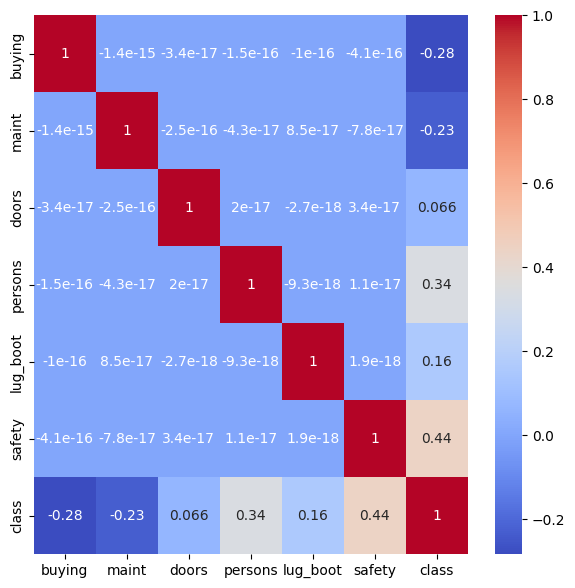

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt



corrmat = data.corr()
plt.figure(figsize=(7, 7)) 
sns.heatmap(corrmat, annot=True, cmap='coolwarm')

In [39]:
Y = data['class']
X = data.drop('class', axis=1)

In [43]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
DT = DecisionTreeClassifier(max_depth=3, random_state=42)


# Perform 10-fold cross-validation
cv_scores = cross_val_score(DT, X, Y, cv=10)

# Output the cross-validation scores for each fold
print(f"Max Decision Tree score: {cv_scores.max()}")


Max Decision Tree score: 0.9011627906976745


In [44]:
# #KNN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
# 
X_scaled = scaler.fit_transform(X)

knn = KNeighborsClassifier(n_neighbors=3)

cv_scores = cross_val_score(knn, X_scaled, Y, cv=10)

# Output the cross-validation scores for each fold
print(f"Max KNN score: {cv_scores.max()}")


Max KNN score: 0.9709302325581395


In [47]:
#SVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#Find best parameters using Hyperparameter Tuning

# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'gamma': ['scale', 'auto', 0.01, 0.1, 1],
#     'kernel': ['linear', 'rbf', 'poly']
# }
# svc = SVC()
# grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, 
#                              scoring='accuracy', cv=5, verbose=2, n_jobs=-1)
# grid_search.fit(X_scaled, Y)
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_
# print(best_params,best_score)
# implement best_params

svc = SVC(C=10, gamma=0.01, kernel= 'rbf')

cv_scores = cross_val_score(svc, X_scaled, Y,cv=2)

# Output the cross-validation scores for each fold
print(f"Max SVC score: {cv_scores.max()}")


Max SVC score: 0.7939814814814815
